# A very straightforward notebook
### to bring together a range of useful basic data eng and data sci techniques

Contents:
  - Import statement
  - Cheatsheets
  - Python Basics
  - Basic data structures
  - Data sourcing
  - SQL and database basics
  - Numpy
  - Pandas
    - Loading data
    - Plotting with pandas
    - Merge dataframes
    - Join dataframes
    - Concat dataframes
    - EXAMPLE Olympic Sports and Medals
    - Data Cleaning
  - Data Visualisation


### Broad import statement

In [1]:
# data sourcing:
import csv

# databases:
import sqlite3

# data toolkit:
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# CHEATSHEETS
[SQL Cheatsheet](https://learnsql.com/blog/ultimate-sql-cheat-sheet/All-sql-cheat-sheet-a4.pdf)

[Numpy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)

[Pandas Cheatsheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

#

# EXAMPLE
## Olympic Sports and Medals, 1896-2014

In [58]:
countries_df = pd.read_csv('../data/dictionary.csv') # load data
summer_df = pd.read_csv('../data/summer.csv')
winter_df = pd.read_csv('../data/winter.csv')
summer_df.rename(columns={'Country':'Code'}, inplace=True) # rename columns
winter_df.rename(columns={'Country':'Code'}, inplace=True)
summer_countries_df = summer_df.merge(countries_df, how='left', on=['Code']) # merge on code into summer_df as left
summer_countries_df['Season'] = 'Summer' # fill new column with string
winter_countries_df = winter_df.merge(countries_df, how='left', on=['Code']) # merge on code into winter_df as left
winter_countries_df['Season'] = 'Winter'
all_df = pd.concat((winter_countries_df, summer_countries_df)) # concatenate matching columned df
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102,Winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Switzerland,8286976.0,80945.079219,Winter


## Data Cleaning

In [59]:
all_df['Country'].isna().sum()

6367

In [60]:
all_df.dropna(subset=['Country'], inplace=True)

In [61]:
all_df['Country'].isna().sum()

0

### Top Countries Analysis - since 1984

In [63]:
all_df.drop_duplicates(keep=False,inplace=True) 
all_df = all_df[all_df['Year'] >= 1984] # filter
top_10_df = all_df.groupby(['Code'])['Medal'].count().sort_values(ascending=False)[:10]
top_10_df = pd.DataFrame(top_10_df)
top_10_df.rename(columns={'Medal':'Medal Count'}, inplace=True);
top_10_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, USA to NED
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Medal Count  10 non-null     int64
dtypes: int64(1)
memory usage: 160.0+ bytes


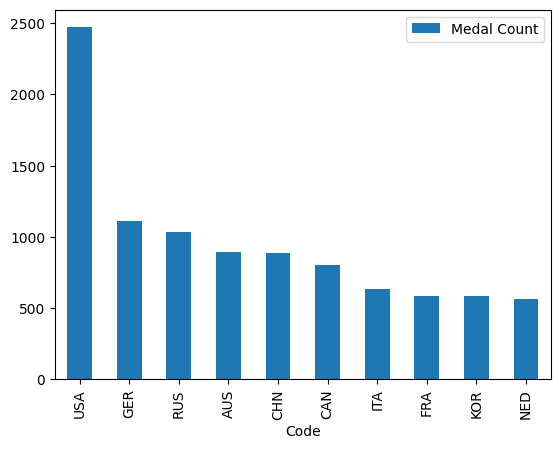

In [64]:
top_10_df.plot(kind="bar");

---

### Top 10 Countries (by Season) since 1984

In [66]:
all_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita,Season
2017,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,10KM,Gold,Norway,5195921.0,74400.369777,Winter
2019,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,20KM,Bronze,Norway,5195921.0,74400.369777,Winter
2030,1984,Sarajevo,Biathlon,Biathlon,"KVALFOSS, Eirik",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter
2031,1984,Sarajevo,Biathlon,Biathlon,"LIRHUS, Odd",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter
2032,1984,Sarajevo,Biathlon,Biathlon,"SÖBAK, Kjell",NOR,Men,4X7.5KM Relay,Silver,Norway,5195921.0,74400.369777,Winter


In [67]:
top_10_season_df = all_df.groupby(['Code', 'Season'])['Medal'].count().unstack()
top_10_season_df.head()

Season,Summer,Winter
Code,,
AFG,2.0,NaN
AHO,1.0,NaN
ALG,15.0,NaN
ARG,173.0,NaN
ARM,11.0,NaN


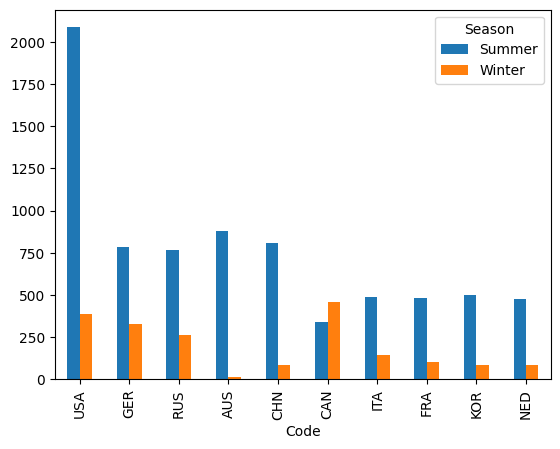

In [68]:
# top_10_season_df['Total'] = top_10_season_df['Summer'] + top_10_season_df['Winter']
top_10_season_df['Total'] = top_10_season_df[["Summer", "Winter"]].sum(axis=1, numeric_only=True)
top_10_season_df.sort_values(by='Total', ascending=False, inplace=True)
top_10_season_df = top_10_season_df[:10]
top_10_season_df[['Summer', 'Winter']].plot(kind="bar");

# DATA VISUALISATION

In [1]:
import matplotlib.pyplot as plt

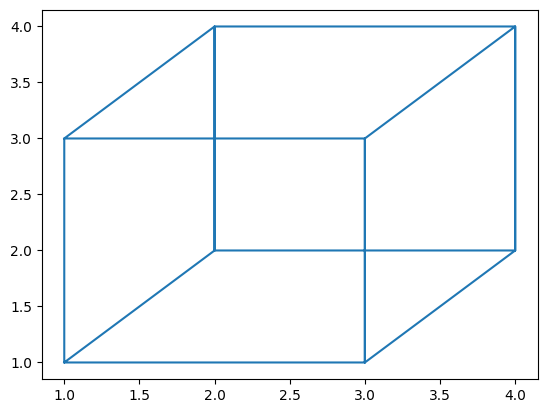

In [4]:
points = [
    {"x": 1, "y": 1},
    {"x": 2, "y": 2},
    {"x": 4, "y": 2},
    {"x": 3, "y": 1},
    {"x": 1, "y": 1},
    {"x": 1, "y": 3},
    {"x": 3, "y": 3},
    {"x": 3, "y": 1},
    {"x": 3, "y": 3},
    {"x": 4, "y": 4},
    {"x": 4, "y": 2},
    {"x": 4, "y": 4},
    {"x": 2, "y": 4},
    {"x": 2, "y": 2},
    {"x": 2, "y": 4},
    {"x": 1, "y": 3},
]
point_df = pd.DataFrame.from_dict(points)
plt.plot(point_df.x, point_df.y);

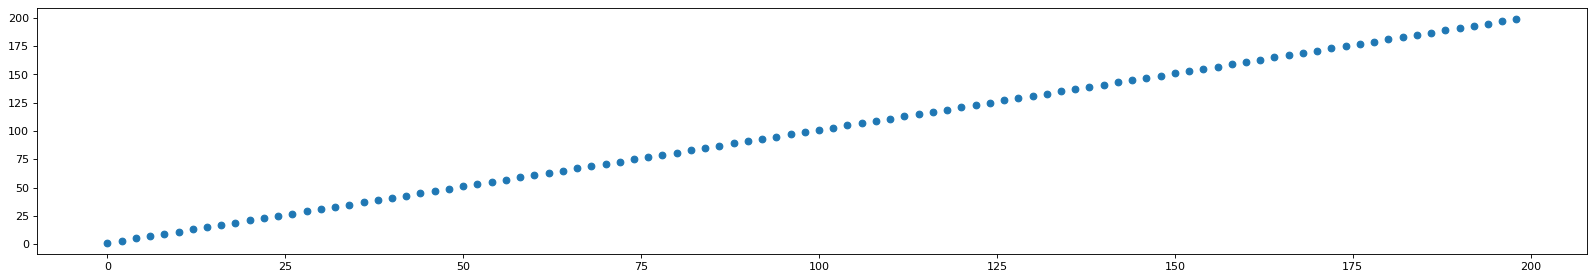

In [74]:
data = np.arange(200)
data.shape=(100,2)
plt.figure(figsize=(25, 4), dpi=80)
plt.scatter(data[:,0], data[:,1]);

(-10.0, 10.0)

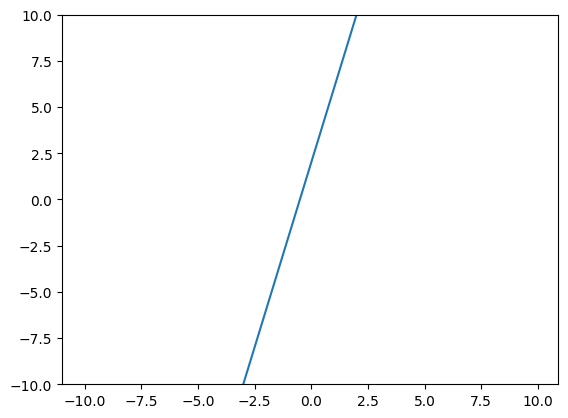

In [4]:
x = np.arange(-10,10,0.1)
y = 4*x + 2
plt.plot(x,y)
plt.ylim(-10,10)

In [5]:
import math
y1 = x*x

def getlog(n):
    if n > 0:   return math.log(n)
    else:       return 0

def gete(n):
    try:        return math.exp(n)
    except:     return 0
    
def getfunc(n):
    try:        return math.exp(n) / (math.exp(n) + 1)
    except:     return 0
    
y2 = list(map(getlog, x))
y3 = list(map(gete,x))
y4 = list(map(getfunc,x))

(-4.0, 4.0)

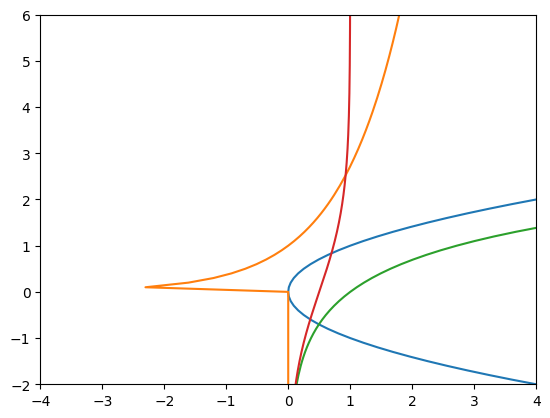

In [6]:
plt.plot(y1,x)
plt.plot(y2,x)
plt.plot(y3,x)
plt.plot(y4,x)
plt.ylim(-2,6)
plt.xlim(-4,4)

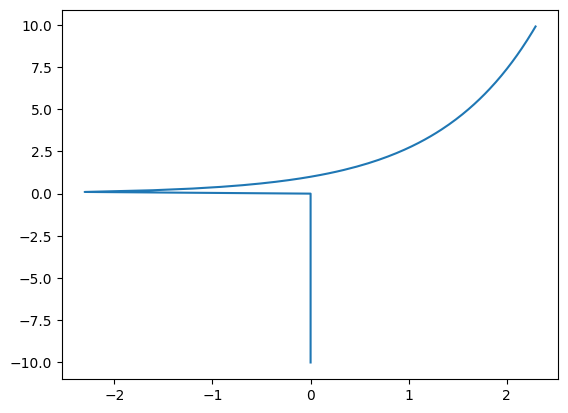

In [7]:
y5 = [getlog(y) if y > 0 else 0 for y in x]
plt.plot(y5,x)

In [5]:
# plot all the numerical features in histograms:
# Plot distribution for the numerical features  available in the dataset

# first, load data:

# load data:
file = "../data/U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
df = gas_df
gas_df.head(3)


,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [ ]:

for variable in gas_df.select_dtypes(exclude = ["object"]).columns:
    print(f"----- Distribution of {variable} : -----")
    sns.histplot(gas_df[variable])
    plt.show()

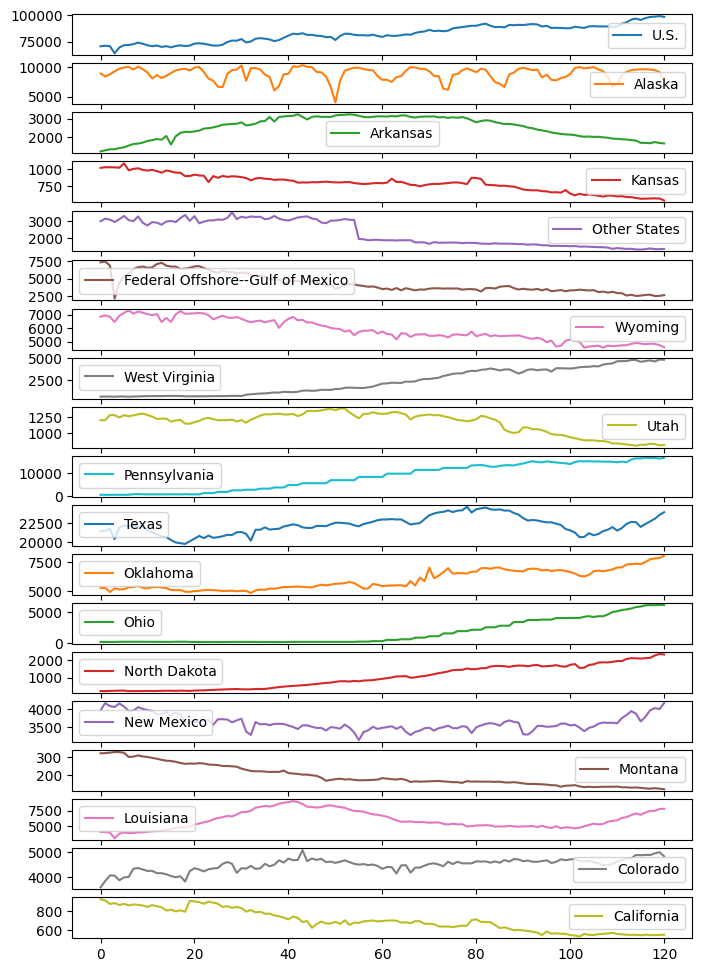

In [4]:
gas_df.plot(subplots=True, figsize=(8,12));

In [6]:
# Import your newly coded _order_ training set
from olist.order import Order

# Change `with_distance_seller_customer` to False..if you have not completed the optional part of challenge 1 yet
orders = Order().get_training_data(with_distance_seller_customer=False)


<AxesSubplot:>

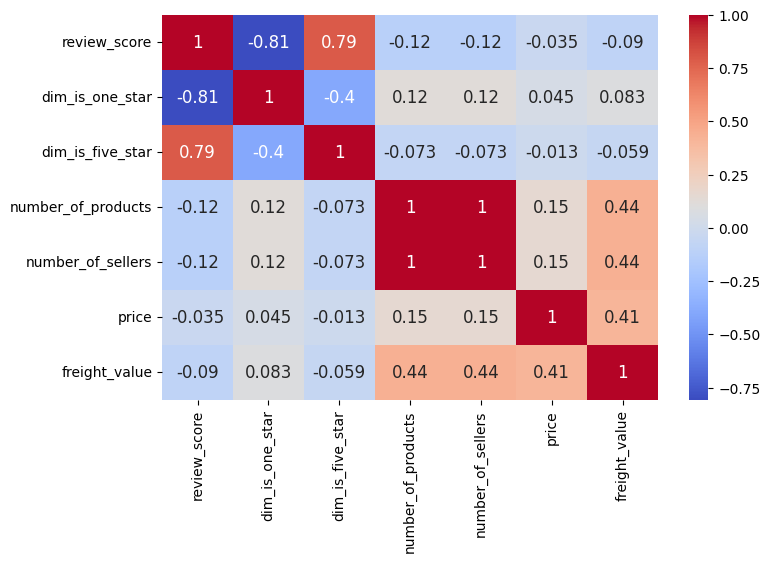

In [9]:

# Correlation plot
plt.figure(figsize=(8,5))
sns.heatmap(orders.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})